## Train ReLayNet
Working code! Details coming soon!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

from networks.relay_net import ReLayNet
from networks.data_utils import get_imdb_data

#torch.set_default_tensor_type('torch.FloatTensor')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [3]:
train_data, test_data = get_imdb_data()
print("Train size: %i" % len(train_data))
print("Test size: %i" % len(test_data))

Train size: 88
Test size: 22


In [7]:
train_data.y.max()

9.0

In [3]:
from networks.relay_net import ReLayNet
from networks.solver import Solver

train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=4)

param ={
        'num_channels':1,
        'num_filters':64,
        'kernel_h':3,
        'kernel_w':7,
        'kernel_c': 1,
        'stride_conv':1,
        'pool':2,
        'stride_pool':2,
        'num_class':10
    }

exp_dir_name = 'Exp01'

relaynet_model = ReLayNet(param)
solver = Solver(optim_args={"lr": 1e-2})
solver.train(relaynet_model, train_loader, val_loader, log_nth=10, num_epochs=10, exp_dir_name=exp_dir_name)


START TRAIN.
[Iteration : 0/100] : 0.5963789224624634
Per class average dice score is 0.978091341457
[Iteration : 0/100] : -0.9353650808334351
Per class average dice score is 1.00212805708
[Iteration : 0/100] : -1.6434041261672974
Per class average dice score is 1.05833369862
[Iteration : 0/100] : -1.3371306657791138
Per class average dice score is 1.04867299108
[Iteration : 0/100] : -1.6746207475662231
Per class average dice score is 1.07905537319
[Iteration : 0/100] : -1.6936511993408203
Per class average dice score is 1.06643572841
[Iteration : 0/100] : -1.7481443881988525
Per class average dice score is 1.12678080744
[Iteration : 0/100] : -1.7021541595458984
Per class average dice score is 1.13213064839
[Iteration : 0/100] : -1.5489957332611084
Per class average dice score is 1.13106373189
[Iteration : 0/100] : -1.680557131767273
Per class average dice score is 1.11715195709
[Iteration : 0/100] : -1.876272201538086
Per class average dice score is 1.07322114977
[Iteration : 0/100] :

Per class average dice score is 1.25022592586
[Iteration : 0/100] : -2.0134410858154297
Per class average dice score is 1.33077188864
[Iteration : 0/100] : -1.9691994190216064
Per class average dice score is 1.18015269697
[Iteration : 0/100] : -1.9885740280151367
Per class average dice score is 1.27348746075
[Iteration : 0/100] : -1.8229753971099854
Per class average dice score is 1.22560287734
[Iteration : 0/100] : -1.8368949890136719
Per class average dice score is 1.27281201071
[Iteration : 0/100] : -2.0166144371032715
Per class average dice score is 1.29760895144
[Iteration : 0/100] : -1.897950291633606
Per class average dice score is 1.21877057252
[Iteration : 0/100] : -1.875945806503296
Per class average dice score is 1.26587454574
[Iteration : 0/100] : -2.0101661682128906
Per class average dice score is 1.24342225843
[Iteration : 0/100] : -1.774661898612976
Per class average dice score is 1.19766338024
[Iteration : 0/100] : -1.9034299850463867
Per class average dice score is 1.2

Per class average dice score is 1.19008965309
[Iteration : 0/100] : -1.9403119087219238
Per class average dice score is 1.179836115
[Iteration : 0/100] : -1.9298019409179688
Per class average dice score is 1.19829551526
[Iteration : 0/100] : -1.9898113012313843
Per class average dice score is 1.21010664329
[Iteration : 0/100] : -1.8755784034729004
Per class average dice score is 1.19579270159
[Iteration : 0/100] : -2.1214184761047363
Per class average dice score is 1.23806843279
[Iteration : 0/100] : -1.9639825820922852
Per class average dice score is 1.22751765752
[Iteration : 0/100] : -1.7540364265441895
Per class average dice score is 1.26284869826
[Iteration : 0/100] : -1.9493416547775269
Per class average dice score is 1.24267321045
[Iteration : 0/100] : -1.9377681016921997
Per class average dice score is 1.24341959793
[Iteration : 0/100] : -1.896075963973999
Per class average dice score is 1.29629323752
[Iteration : 0/100] : -2.0151872634887695
Per class average dice score is 1.3

## Save the Model

When you are satisfied with your training, you can save the model.

In [4]:
relaynet_model.save("models/relaynet_good_new.model")

Saving model... models/relaynet_good_new.model


# Deploy Model on Test Data

In [28]:
SEG_LABELS_LIST = [
    {"id": -1, "name": "void", "rgb_values": [0, 0, 0]},
    {"id": 0, "name": "Region above the retina (RaR)", "rgb_values": [128, 0, 0]},
    {"id": 1, "name": "ILM: Inner limiting membrane", "rgb_values": [0, 128, 0]},
    {"id": 2, "name": "NFL-IPL: Nerve fiber ending to Inner plexiform layer", "rgb_values": [128, 128, 0]},
    {"id": 3, "name": "INL: Inner Nuclear layer", "rgb_values": [0, 0, 128]},
    {"id": 4, "name": "OPL: Outer plexiform layer", "rgb_values": [128, 0, 128]},
    {"id": 5, "name": "ONL-ISM: Outer Nuclear layer to Inner segment myeloid", "rgb_values": [0, 128, 128]},
    {"id": 6, "name": "ISE: Inner segment ellipsoid", "rgb_values": [128, 128, 128]},
    {"id": 7, "name": "OS-RPE: Outer segment to Retinal pigment epithelium", "rgb_values": [64, 0, 0]},
    {"id": 8, "name": "Region below RPE (RbR)", "rgb_values": [192, 0, 0]},
    {"id": 9, "name": "Fluid region", "rgb_values": [64, 128, 0]}];
    
def label_img_to_rgb(label_img):
    label_img = np.squeeze(label_img)
    labels = np.unique(label_img)
    label_infos = [l for l in SEG_LABELS_LIST if l['id'] in labels]

    label_img_rgb = np.array([label_img,
                              label_img,
                              label_img]).transpose(1,2,0)
    for l in label_infos:
        mask = label_img == l['id']
        label_img_rgb[mask] = l['rgb_values']

    return label_img_rgb.astype(np.uint8)

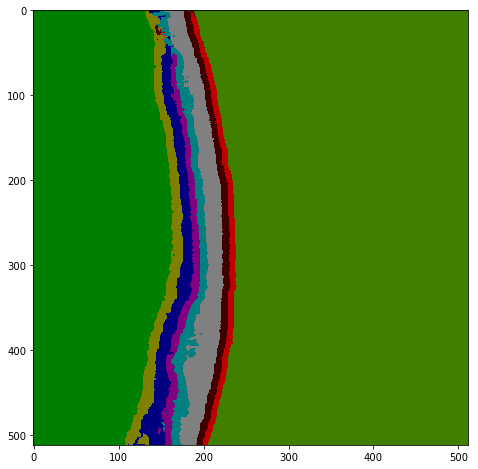

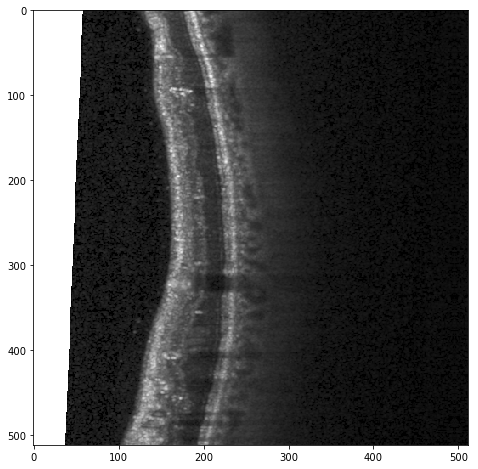

In [29]:
import matplotlib.pyplot as plt

relaynet_model =  torch.load('models/relaynet_good_new.model')
out = relaynet_model(Variable(torch.Tensor(test_data.X[11:12]).cuda(),volatile=True))
max_val, idx = torch.max(out,1)
idx = idx.data.cpu().numpy()
#idx = np.squeeze((idx * 100) % 256).astype('uint8')
idx = label_img_to_rgb(idx)
plt.imshow(idx)
plt.show()

img_test = test_data.X[11:12]
img_test = np.squeeze(img_test)
plt.imshow(img_test)
plt.show()